In [53]:
from utils import *

In [54]:
def greedy_search(free_nodes, distance_matrix):

    free_nodes = list(free_nodes)

    start_node = np.random.choice(free_nodes)
    cycle1 = [start_node]
    free_nodes.remove(start_node)
    closest_node = min(free_nodes, key=lambda node: distance_matrix[cycle1[-1]][node])
    cycle1.append(closest_node)
    free_nodes.remove(closest_node)

    start_node = np.random.choice(free_nodes)
    cycle2 = [start_node]
    free_nodes.remove(start_node)
    closest_node = min(free_nodes, key=lambda node: distance_matrix[cycle2[-1]][node])
    cycle2.append(closest_node)
    free_nodes.remove(closest_node)


    cycle1 = list(cycle1)
    cycle2 = list(cycle2)
    free_nodes = list(free_nodes)

    while len(free_nodes) > 0:
        best_update1 = float('inf')
        best_node1 = None
        best_position1 = -1
        
        for node in free_nodes:
            for i in range(len(cycle1)):
                distance_update = distance_matrix[cycle1[i-1]][node] + distance_matrix[node][cycle1[i]] - distance_matrix[cycle1[i-1]][cycle1[i]]
                if distance_update < best_update1:
                    best_update1 = distance_update
                    best_node1 = node
                    best_position1 = i
        
        if best_node1 is not None:
            cycle1.insert(best_position1, best_node1)
            free_nodes.remove(best_node1)
        
        best_update2 = float('inf')
        best_node2 = None
        best_position2 = -1
        
        for node in free_nodes:
            for i in range(len(cycle2)):
                distance_update = distance_matrix[cycle2[i-1]][node] + distance_matrix[node][cycle2[i]] - distance_matrix[cycle2[i-1]][cycle2[i]]
                if distance_update < best_update2:
                    best_update2 = distance_update
                    best_node2 = node
                    best_position2 = i
        
        if best_node2 is not None:
            cycle2.insert(best_position2, best_node2)
            free_nodes.remove(best_node2)

    return cycle1, cycle2

In [55]:
times = []
lengths = []
cycles = []

for file in ["data/kroA200.tsp", "data/kroB200.tsp"]:
    data = read_data_file(file)
    nodes = get_nodes(data)
    distance_matrix = calculate_distance_matrix(data)

    for i in range(10):

        start = time.time()
        cycle1, cycle2 = greedy_search(nodes, distance_matrix)
                    
        time_taken = time.time() - start
        length = calculate_cycles_length(cycle1, cycle2, distance_matrix)

        times.append((file, time_taken))
        lengths.append((file, length))
        cycles.append((file, cycle1, cycle2))

In [56]:
times_df = pd.DataFrame(times, columns=["Instance", "Time"])
times_df

,Instance,Time
0,data/kroA200.tsp,0.416999
1,data/kroA200.tsp,0.408000
2,data/kroA200.tsp,0.408000
3,data/kroA200.tsp,0.405000
4,data/kroA200.tsp,0.399002
5,data/kroA200.tsp,0.402000
6,data/kroA200.tsp,0.389998
7,data/kroA200.tsp,0.395000
8,data/kroA200.tsp,0.404000
9,data/kroA200.tsp,0.398000


In [57]:
lengths_df = pd.DataFrame(lengths, columns=["Instance", "Length"])
    lengths_df

,Instance,Length
0,data/kroA200.tsp,39835.479695
1,data/kroA200.tsp,39534.173275
2,data/kroA200.tsp,39580.231474
3,data/kroA200.tsp,39846.510349
4,data/kroA200.tsp,36206.858653
5,data/kroA200.tsp,37750.673087
6,data/kroA200.tsp,38807.767296
7,data/kroA200.tsp,37090.638575
8,data/kroA200.tsp,39648.850582
9,data/kroA200.tsp,35901.488401


In [58]:
# Grupowanie danych i obliczanie statystyk
time_stats = times_df.groupby(["Instance"])["Time"].agg(['min', 'mean', 'max']).reset_index()
length_stats = lengths_df.groupby(["Instance"])["Length"].agg(['min', 'mean', 'max']).reset_index()

# Łączenie statystyk w jeden DataFrame
stats_df = pd.merge(time_stats, length_stats, on=["Instance"], suffixes=("_time", "_length"))
stats_df

,Instance,min_time,mean_time,max_time,min_length,mean_length,max_length
0,data/kroA200.tsp,0.389998,0.4026,0.416999,35901.488401,38420.267139,39846.510349
1,data/kroB200.tsp,0.389000,0.3955,0.401001,34833.709724,38568.981640,41607.480864


In [59]:
cycles_df = pd.DataFrame(cycles, columns=["Instance", "Cycle1", "Cycle2"])
def calculate_length(row):
    data = read_data_file(row['Instance'])
    distance_matrix = calculate_distance_matrix(data)
    return calculate_cycles_length(row['Cycle1'], row['Cycle2'], distance_matrix)

cycles_df = pd.DataFrame(cycles, columns=["Instance", "Cycle1", "Cycle2"])
cycles_df['Cycle_Length'] = cycles_df.apply(calculate_length, axis=1)
cycles_df

,Instance,Cycle1,Cycle2,Cycle_Length
0,data/kroA200.tsp,"[12, 40, 115, 53, 15, 162, 67, 120, 107, 109, ...","[145, 20, 64, 135, 42, 127, 155, 183, 8, 146, ...",39835.479695
1,data/kroA200.tsp,"[107, 157, 75, 134, 22, 8, 183, 155, 112, 127,...","[96, 166, 52, 11, 84, 170, 122, 116, 188, 194,...",39534.173275
2,data/kroA200.tsp,"[72, 185, 168, 125, 54, 157, 31, 67, 47, 120, ...","[32, 24, 159, 174, 121, 46, 172, 136, 61, 138,...",39580.231474
3,data/kroA200.tsp,"[125, 77, 158, 128, 60, 101, 4, 192, 14, 108, ...","[34, 90, 143, 103, 58, 141, 171, 200, 148, 133...",39846.510349
4,data/kroA200.tsp,"[34, 25, 17, 8, 155, 183, 75, 22, 134, 146, 12...","[135, 127, 186, 112, 120, 107, 109, 6, 54, 2, ...",36206.858653
5,data/kroA200.tsp,"[32, 24, 136, 61, 138, 124, 184, 37, 118, 16, ...","[40, 27, 198, 123, 15, 160, 79, 20, 64, 162, 6...",37750.673087
6,data/kroA200.tsp,"[102, 76, 70, 144, 94, 95, 91, 150, 173, 23, 1...","[29, 184, 37, 18, 190, 19, 119, 92, 10, 175, 9...",38807.767296
7,data/kroA200.tsp,"[39, 129, 146, 143, 17, 25, 90, 34, 103, 114, ...","[157, 75, 134, 22, 8, 183, 155, 112, 127, 135,...",37090.638575
8,data/kroA200.tsp,"[59, 3, 73, 189, 131, 180, 156, 81, 97, 197, 4...","[76, 102, 144, 21, 154, 140, 164, 89, 41, 167,...",39648.850582
9,data/kroA200.tsp,"[48, 104, 165, 126, 87, 96, 166, 84, 11, 52, 1...","[195, 182, 94, 91, 76, 70, 102, 144, 21, 154, ...",35901.488401


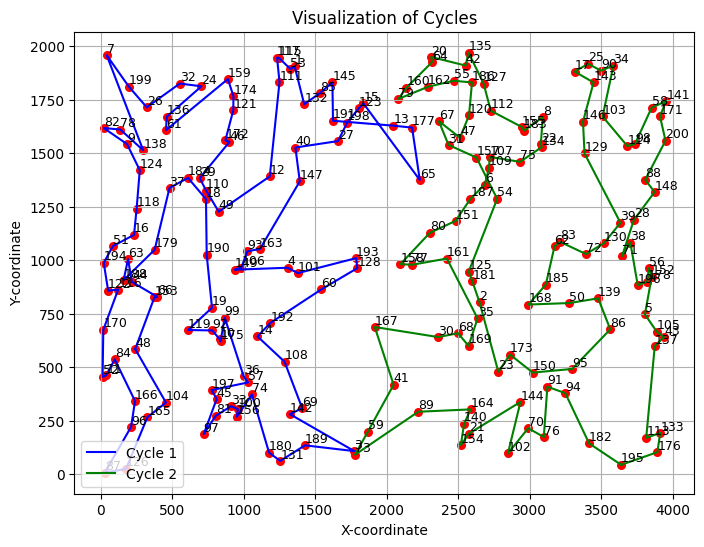

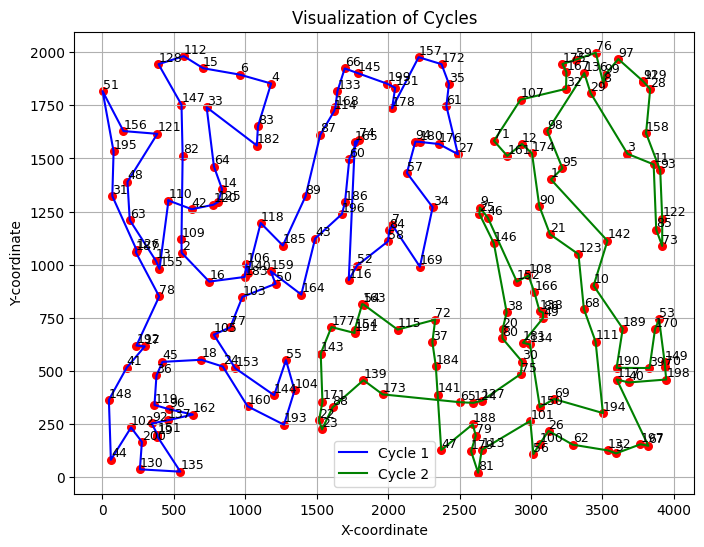

In [60]:
# Group by 'Instance' and 'Method' and find the index of the minimum 'Cycle_Length'
min_cycle_indices = cycles_df.groupby(['Instance'])['Cycle_Length'].idxmin()

# Use the indices to get the rows with the minimum 'Cycle_Length'
min_cycles_df = cycles_df.loc[min_cycle_indices]

min_cycles_df

# if dir plots does not exist create it
if not os.path.exists('plots'):
    os.makedirs('plots')

for i, row in min_cycles_df.iterrows():
    plot_cycles(row['Cycle1'], row['Cycle2'], read_data_file(row['Instance']), f"plots/plot_{row['Instance'].replace('/', '')}_greedy.png")